In [ ]:
!pip uninstall pandas-profiling -y


import pandas as pd

# Loading the dataset
# My Dataset is about Student Performance.
df = pd.read_csv('/content/StudentPerformanceFactors.csv')


Found existing installation: pandas-profiling 3.6.6
Uninstalling pandas-profiling-3.6.6:
  Successfully uninstalled pandas-profiling-3.6.6


In [ ]:
print(df.head(10))


   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   
5             19          88               Medium              Medium   
6             29          84               Medium                 Low   
7             25          78                  Low                High   
8             17          94               Medium                High   
9             23          98               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No          

In [ ]:
print(df.describe())


       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [ ]:
print(df.isnull().sum())


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


**DATA CLEANING**

In [ ]:
df.fillna(method='ffill', inplace=True)
df.dropna(inplace=True)  # dropping of missing values


<ipython-input-20-9edf73e9554f>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Example of forward filling


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df['Gender'] = df['Gender'].astype('category')


**EDA**

In [ ]:
#INSIGHT 1
avg_exam_score = df.groupby('Hours_Studied')['Exam_Score'].mean()
print(avg_exam_score)


Hours_Studied
1     71.000000
2     63.000000
3     61.333333
4     61.647059
5     62.857143
6     63.470588
7     64.352941
8     64.155172
9     64.162791
10    64.393617
11    64.979452
12    64.765625
13    64.724771
14    65.576208
15    65.590476
16    66.182336
17    66.328084
18    67.042394
19    66.959184
20    66.950538
21    67.682135
22    67.480100
23    68.180049
24    68.187675
25    68.847751
26    68.665399
27    69.462882
28    69.608187
29    70.283582
30    70.617886
31    70.688312
32    70.944444
33    70.025000
34    70.724138
35    71.800000
36    71.181818
37    73.333333
38    72.714286
39    74.714286
43    78.000000
44    71.000000
Name: Exam_Score, dtype: float64


In [ ]:
#INSIGHT 2
attendance_exam_score = df.groupby('Attendance')['Exam_Score'].mean()
print(attendance_exam_score)


Attendance
60     62.413793
61     63.384146
62     63.756579
63     64.361290
64     63.884615
65     63.905063
66     64.537931
67     64.626316
68     65.147059
69     65.123529
70     65.527950
71     65.611111
72     65.694611
73     65.952381
74     66.272727
75     66.288591
76     66.886486
77     66.668478
78     66.890909
79     66.828571
80     67.088757
81     67.232143
82     67.341040
83     67.968153
84     67.742857
85     67.883562
86     68.655629
87     68.741722
88     68.909677
89     69.104938
90     70.012821
91     69.417143
92     69.727273
93     69.820359
94     69.588889
95     70.067485
96     70.571429
97     70.378882
98     70.684492
99     70.889610
100    70.765432
Name: Exam_Score, dtype: float64


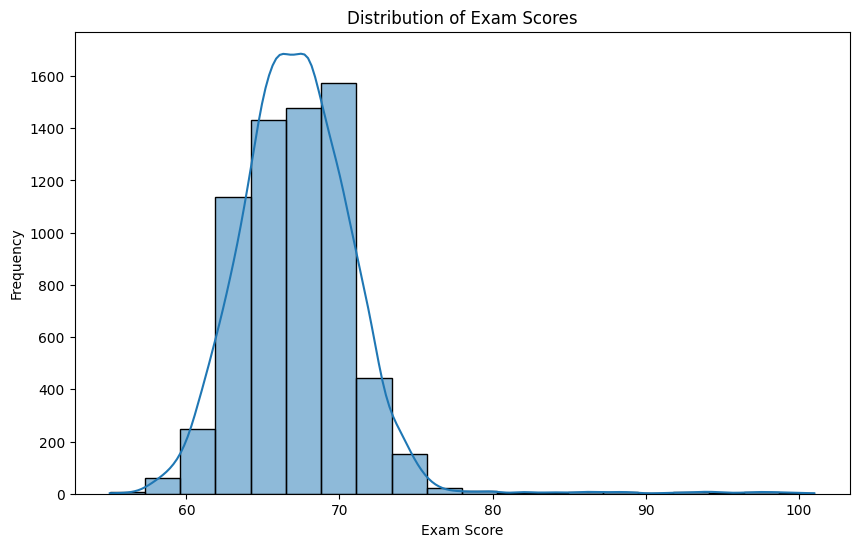

In [ ]:
#Visualization
#Histogram
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score'], bins=20, kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()


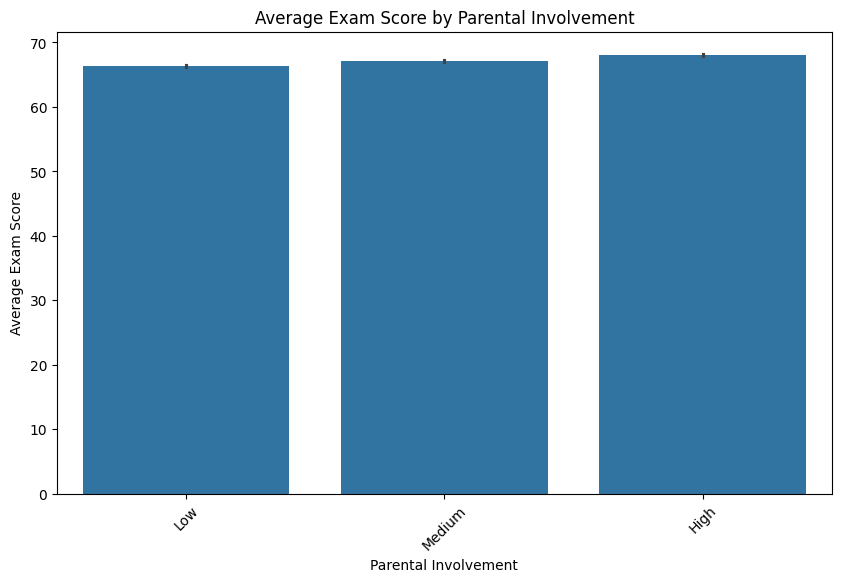

In [ ]:
#BarPlot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Parental_Involvement', y='Exam_Score', estimator='mean')
plt.title('Average Exam Score by Parental Involvement')
plt.xlabel('Parental Involvement')
plt.ylabel('Average Exam Score')
plt.xticks(rotation=45)
plt.show()


In [ ]:
!pip install bokeh




In [ ]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource

df = pd.read_csv('/content/StudentPerformanceFactors.csv')

source = ColumnDataSource(df)

output_notebook()

p = figure(title="Hours Studied vs Exam Score", x_axis_label='Hours Studied', y_axis_label='Exam Score')
p.scatter(x='Hours_Studied', y='Exam_Score', source=source, size=10, color="navy", alpha=0.5)

show(p)


**ADVANCED ANALYSIS**

In [ ]:
#Statistical Analysis
import numpy as np

mean_score = np.mean(df['Exam_Score'])
median_score = np.median(df['Exam_Score'])
std_dev_score = np.std(df['Exam_Score'])
print(f'Mean Exam Score: {mean_score}, Median: {median_score}, Std Dev: {std_dev_score}')


Mean Exam Score: 67.23565914938702, Median: 67.0, Std Dev: 3.8901613508847057


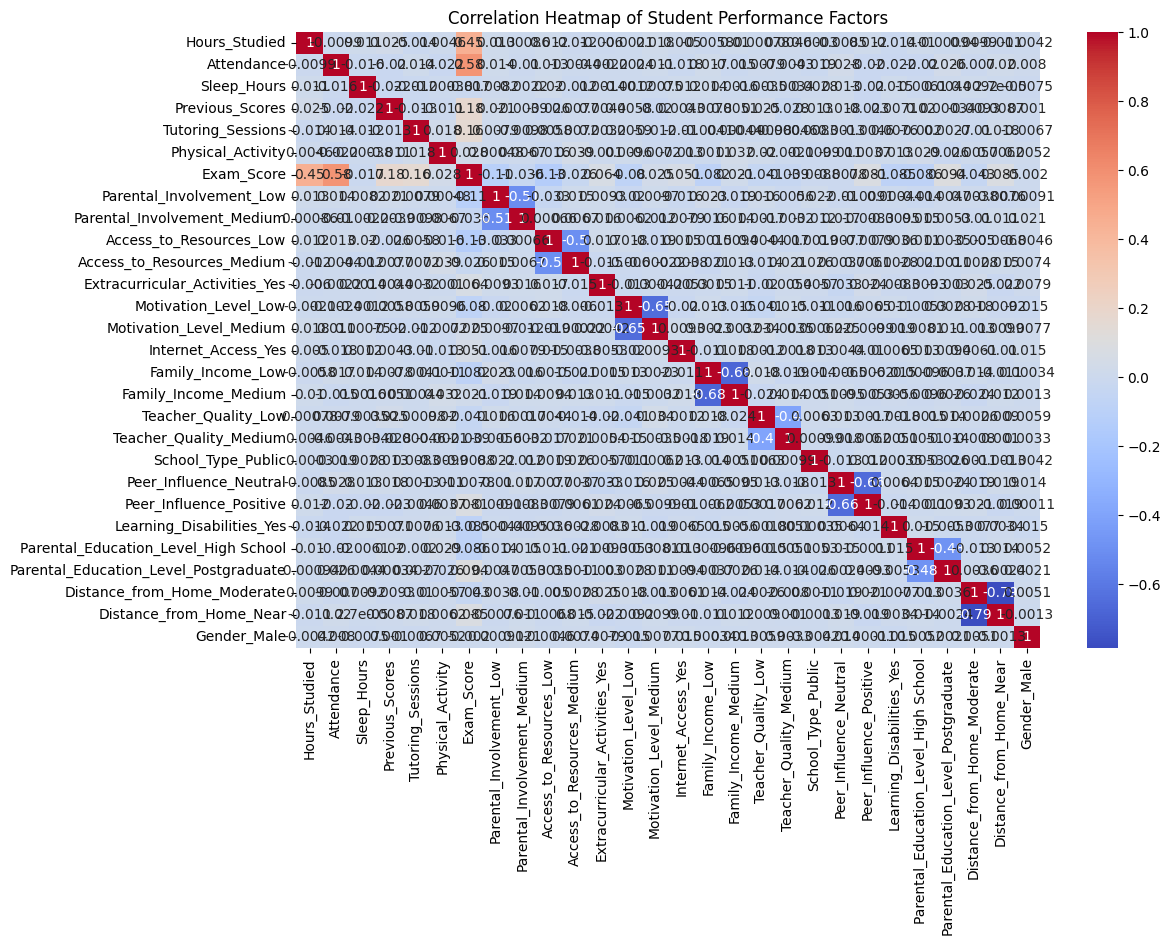

In [ ]:
# Correlation Heatmap
df_encoded = pd.get_dummies(df, drop_first=True)

correlation_matrix = df_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Student Performance Factors')
plt.show()

**Visualizations**

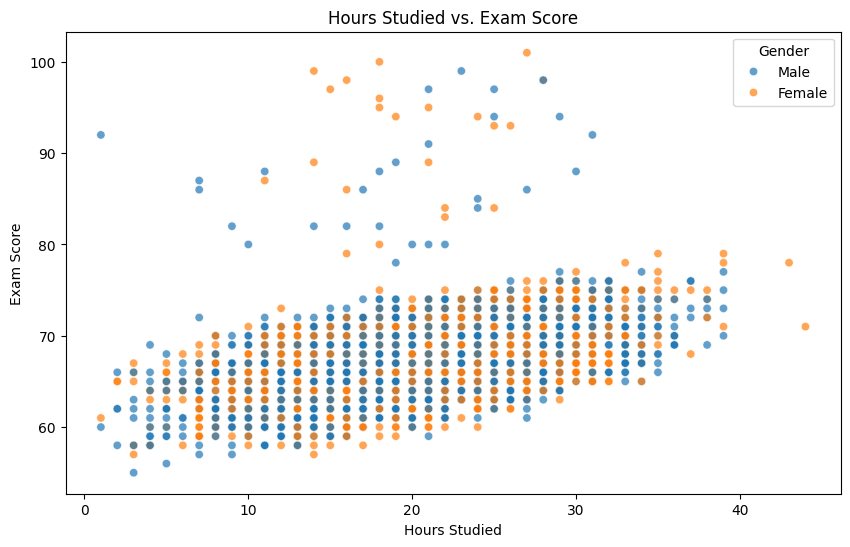

In [ ]:
#Final Visualizations
#Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score', hue='Gender', alpha=0.7)
plt.title('Hours Studied vs. Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend(title='Gender')
plt.show()
